<a href="https://colab.research.google.com/github/asrianda/latAlgoritma/blob/main/Program_Mahasiswa_45.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [3]:
df=pd.read_csv('abc.csv')
df.head()

,NAMA,ALAMAT,AUD,SD,SMP,SMA,DISABILITAS,LANSIA,HAMIL,NOMINAL,STATUS RUMAH,JENIS DINDING,FASILITAS JAMBAN,KENDARAAN,PEKERJAAN,TARGET
0,KASTRI,ATU LINTANG,0,0,0,0,0,2,0,1200000,1,2,2,2,3,Layak
1,NURUL FATIMAH,ATU LINTANG,1,1,0,0,0,0,0,975000,2,2,1,1,1,Tidak Layak
2,FITRI SURYANI,ATU LINTANG,0,1,0,0,0,0,0,225000,2,2,1,2,1,Layak
3,SUPARNI,ATU LINTANG,0,0,0,0,0,1,0,600000,3,1,1,1,4,Layak
4,RUMINI,ATU LINTANG,0,1,1,0,0,0,0,600000,1,1,1,1,3,Tidak Layak


In [7]:
df['TARGET'].value_counts()

,count
TARGET,
Layak,286
Tidak Layak,265


**Ini salah karena masih menggunakan ID3**

=== Struktur Pohon C4.5 Manual ===

=== Laporan Klasifikasi ===
              precision    recall  f1-score   support

           0       0.96      0.83      0.89        52
           1       0.86      0.97      0.91        59

    accuracy                           0.90       111
   macro avg       0.91      0.90      0.90       111
weighted avg       0.91      0.90      0.90       111

Akurasi: 0.9009009009009009


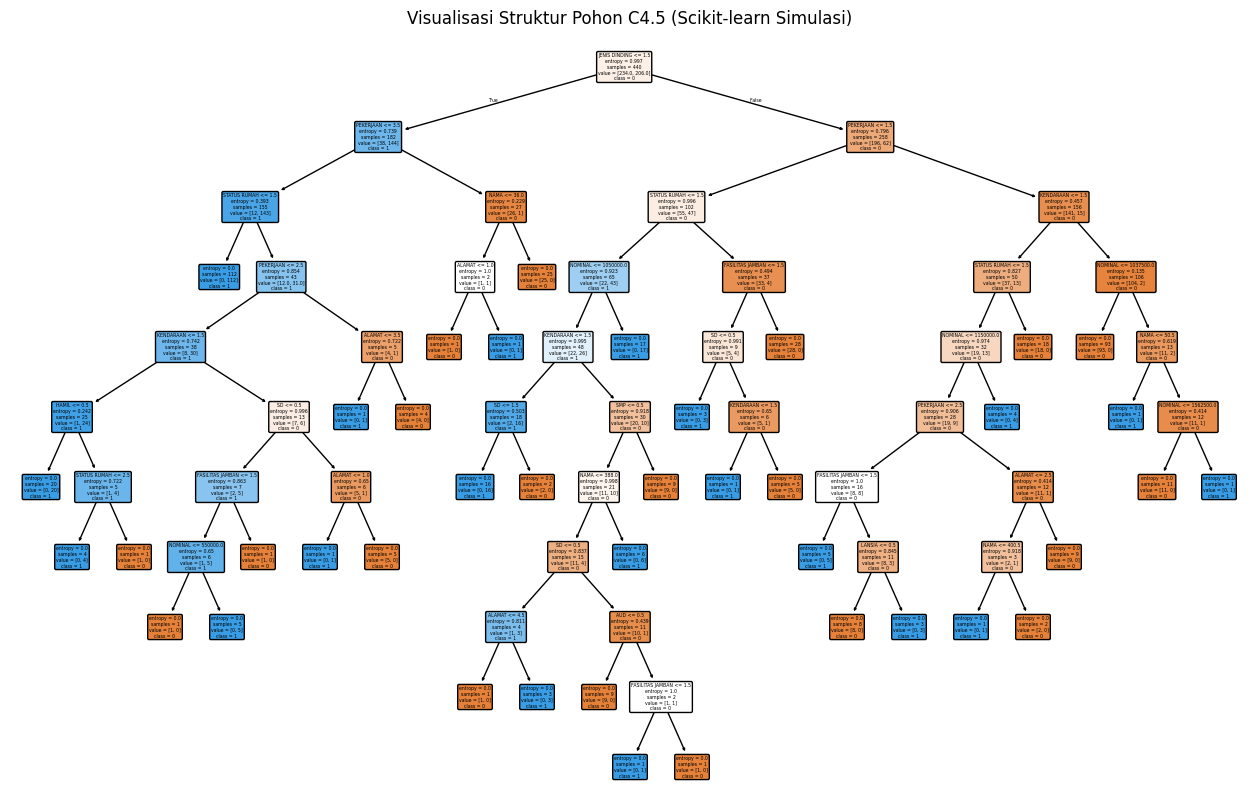

In [12]:
import pandas as pd
import numpy as np
import math
from pprint import pprint
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# --- Load Dataset ---
df = pd.read_csv('abc.csv')  # ganti dengan 'abc.csv' jika lokal

# --- Konversi kategorik jika diperlukan ---
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].astype('category')

# --- Fungsi Entropy ---
def entropy(data, target_col):
    values = data[target_col].unique()
    entropy = 0
    for val in values:
        p = len(data[data[target_col] == val]) / len(data)
        if p > 0:
            entropy -= p * math.log2(p)
    return entropy

# --- Fungsi Gain & Gain Ratio ---
def gain_ratio(data, feature, target_col):
    total_entropy = entropy(data, target_col)
    values = data[feature].unique()
    split_entropy = 0
    intrinsic_info = 0

    for val in values:
        subset = data[data[feature] == val]
        p = len(subset) / len(data)
        split_entropy += p * entropy(subset, target_col)
        if p > 0:
            intrinsic_info -= p * math.log2(p)

    info_gain = total_entropy - split_entropy
    if intrinsic_info == 0:
        return 0
    return info_gain / intrinsic_info

# --- Fungsi C4.5 Manual ---
def c45(data, original_data, features, target_col, default_class=None):
    classes = data[target_col].unique()

    if len(data) == 0:
        return default_class
    if len(classes) == 1:
        return classes[0]
    if len(features) == 0:
        return data[target_col].mode()[0]

    default_class = data[target_col].mode()[0]
    gain_ratios = [gain_ratio(data, feature, target_col) for feature in features]
    best_feature_index = np.argmax(gain_ratios)
    best_feature = features[best_feature_index]

    tree = {best_feature: {}}
    remaining_features = [f for f in features if f != best_feature]

    for val in data[best_feature].unique():
        subset = data[data[best_feature] == val]
        subtree = c45(subset, original_data, remaining_features, target_col, default_class)
        tree[best_feature][val] = subtree

    return tree

# --- Tentukan target dan fitur ---
target_col = "TARGET"  # Ganti sesuai nama kolom target Anda
features = [col for col in df.columns if col != target_col]

# Cek kolom target
if target_col not in df.columns:
    print(f"Kolom target '{target_col}' tidak ditemukan.")
else:
    # --- Bangun pohon manual ---
    print("=== Struktur Pohon C4.5 Manual ===")
    decision_tree = c45(df, df, features, target_col)
#    pprint(decision_tree)

    # --- Evaluasi dengan Scikit-learn (untuk laporan & visualisasi) ---
    df_encoded = df.copy()
    for col in df_encoded.columns:
        if df_encoded[col].dtype.name == 'category':
            df_encoded[col] = df_encoded[col].cat.codes

    X = df_encoded.drop(columns=[target_col])
    y = df_encoded[target_col]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    clf = DecisionTreeClassifier(criterion='entropy')  # simulasi C4.5
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # --- Akurasi & Laporan ---
    print("\n=== Laporan Klasifikasi ===")
    print(classification_report(y_test, y_pred))
    print("Akurasi:", accuracy_score(y_test, y_pred))

    # --- Visualisasi Pohon ---
    plt.figure(figsize=(16, 10))
    plot_tree(clf, feature_names=X.columns, class_names=[str(c) for c in np.unique(y)], filled=True, rounded=True)
    plt.title("Visualisasi Struktur Pohon C4.5 (Scikit-learn Simulasi)")
    plt.show()



=== Laporan Klasifikasi ===
              precision    recall  f1-score   support

       Layak       0.95      0.83      0.89        24
 Tidak Layak       0.93      0.98      0.95        52

    accuracy                           0.93        76
   macro avg       0.94      0.91      0.92        76
weighted avg       0.94      0.93      0.93        76

Akurasi: 0.9342105263157895


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.772151 to fit


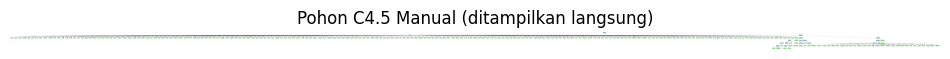

In [19]:
import pandas as pd
import numpy as np
import math
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from IPython.display import display
from PIL import Image
from io import BytesIO
import base64

# === Load Dataset ===
df = pd.read_csv('abc.csv')
target_col = "TARGET"  # Ganti jika berbeda
features = [col for col in df.columns if col != target_col]

# --- Konversi kategorik ---
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].astype('category')

# --- Entropy & Gain Ratio ---
def entropy(data, target_col):
    entropy = 0
    for val in data[target_col].unique():
        p = len(data[data[target_col] == val]) / len(data)
        if p > 0:
            entropy -= p * math.log2(p)
    return entropy

def gain_ratio(data, feature, target_col):
    total_entropy = entropy(data, target_col)
    values = data[feature].unique()
    split_entropy = 0
    intrinsic_info = 0
    for val in values:
        subset = data[data[feature] == val]
        p = len(subset) / len(data)
        split_entropy += p * entropy(subset, target_col)
        if p > 0:
            intrinsic_info -= p * math.log2(p)
    info_gain = total_entropy - split_entropy
    return info_gain / intrinsic_info if intrinsic_info != 0 else 0

# --- Struktur Node C4.5 ---
class C45Node:
    def __init__(self, name, is_leaf=False, gain_ratio_value=None):
        self.name = name
        self.is_leaf = is_leaf
        self.gain_ratio_value = gain_ratio_value
        self.children = {}

# --- Membangun Pohon ---
def build_c45_tree(data, features, target_col):
    if len(data[target_col].unique()) == 1:
        return C45Node(str(data[target_col].iloc[0]), is_leaf=True)
    if len(features) == 0:
        return C45Node(str(data[target_col].mode()[0]), is_leaf=True)

    gain_ratios = [gain_ratio(data, f, target_col) for f in features]
    best_idx = np.argmax(gain_ratios)
    best_feature = features[best_idx]
    best_gain = gain_ratios[best_idx]

    root = C45Node(name=best_feature, gain_ratio_value=best_gain)
    for val in data[best_feature].unique():
        subset = data[data[best_feature] == val]
        if subset.empty:
            child = C45Node(str(data[target_col].mode()[0]), is_leaf=True)
        else:
            child = build_c45_tree(subset, [f for f in features if f != best_feature], target_col)
        root.children[val] = child
    return root

# --- Prediksi Manual ---
def predict_with_tree(row, node):
    while not node.is_leaf:
        val = row.get(node.name)
        if val in node.children:
            node = node.children[val]
        else:
            return None
    return node.name

# --- Visualisasi langsung di layar (tanpa simpan file) ---
def visualize_tree_inline(node, dot=None, parent=None, edge_label=""):
    if dot is None:
        dot = graphviz.Digraph(format="png")
        dot.attr('node', style='filled')

    node_id = str(id(node))
    if node.is_leaf:
        dot.node(node_id, label=f"Label: {node.name}", fillcolor='lightgreen', shape='oval')
    else:
        label = f"{node.name}\nGain Ratio: {node.gain_ratio_value:.4f}"
        dot.node(node_id, label=label, fillcolor='lightblue', shape='box')

    if parent:
        dot.edge(parent, node_id, label=str(edge_label))

    for val, child in node.children.items():
        visualize_tree_inline(child, dot, node_id, val)

    return dot

# === Eksekusi: Build Tree, Prediksi, Evaluasi ===
train_data, test_data = train_test_split(df, test_size=0.3, random_state=42)
tree_root = build_c45_tree(train_data, features, target_col)

# Prediksi
y_true = test_data[target_col].astype(str).values
y_pred = [predict_with_tree(row, tree_root) for _, row in test_data.iterrows()]
filtered = [(yt, yp) for yt, yp in zip(y_true, y_pred) if yp is not None]
y_true_clean, y_pred_clean = zip(*filtered)

# Laporan klasifikasi
print("\n=== Laporan Klasifikasi ===")
print(classification_report(y_true_clean, y_pred_clean))
print("Akurasi:", accuracy_score(y_true_clean, y_pred_clean))

# === Visualisasi langsung di layar ===
dot = visualize_tree_inline(tree_root)

# Tampilkan langsung di layar (inline)
png_data = dot.pipe(format='png')
image = Image.open(BytesIO(png_data))

# Tampilkan dengan matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 12))
plt.imshow(image)
plt.axis('off')
plt.title("Pohon C4.5 Manual (ditampilkan langsung)")
plt.show()


In [20]:
# Coba baca ulang dataset abc.csv
df = pd.read_csv("abc.csv")

# Bersihkan nama kolom: hilangkan spasi dan karakter aneh
df.columns = df.columns.str.strip().str.replace(" ", "_").str.replace("[^A-Za-z0-9_]", "", regex=True)

# Deteksi kolom target secara otomatis jika ada kata kunci umum
target_candidates = [col for col in df.columns if col.lower() in ["target", "kelas", "kelayakan", "label", "status"]]
target_col = target_candidates[0] if target_candidates else df.columns[-1]

# Pisahkan fitur dan target
features = [col for col in df.columns if col != target_col]

# Deteksi kolom numerik dan ubah ke kategori (diskretisasi otomatis)
for col in df[features].select_dtypes(include=["int64", "float64"]).columns:
    try:
        df[col] = pd.qcut(df[col], q=3, duplicates='drop', labels=["Rendah", "Sedang", "Tinggi"])
    except:
        df[col] = pd.cut(df[col], bins=3, labels=["Rendah", "Sedang", "Tinggi"])

# Hilangkan baris yang mengandung nilai kosong
df = df.dropna()

# Ubah semua kolom ke kategori
for col in df.columns:
    df[col] = df[col].astype("category")

# Tampilkan preview hasil perbaikan
df.head()


,NAMA,ALAMAT,AUD,SD,SMP,SMA,DISABILITAS,LANSIA,HAMIL,NOMINAL,STATUS_RUMAH,JENIS_DINDING,FASILITAS_JAMBAN,KENDARAAN,PEKERJAAN,TARGET
0,KASTRI,ATU LINTANG,Rendah,Rendah,Rendah,Rendah,Rendah,Tinggi,Rendah,Tinggi,Rendah,Tinggi,Tinggi,Tinggi,Sedang,Layak
1,NURUL FATIMAH,ATU LINTANG,Sedang,Sedang,Rendah,Rendah,Rendah,Rendah,Rendah,Tinggi,Sedang,Tinggi,Rendah,Rendah,Rendah,Tidak Layak
2,FITRI SURYANI,ATU LINTANG,Rendah,Sedang,Rendah,Rendah,Rendah,Rendah,Rendah,Rendah,Sedang,Tinggi,Rendah,Tinggi,Rendah,Layak
3,SUPARNI,ATU LINTANG,Rendah,Rendah,Rendah,Rendah,Rendah,Sedang,Rendah,Rendah,Tinggi,Rendah,Rendah,Rendah,Tinggi,Layak
4,RUMINI,ATU LINTANG,Rendah,Sedang,Tinggi,Rendah,Rendah,Rendah,Rendah,Rendah,Rendah,Rendah,Rendah,Rendah,Sedang,Tidak Layak


## **Program C4.5 Yang Benar**


=== Laporan Klasifikasi ===
              precision    recall  f1-score   support

       Layak       1.00      0.93      0.96        14
 Tidak Layak       0.98      1.00      0.99        41

    accuracy                           0.98        55
   macro avg       0.99      0.96      0.98        55
weighted avg       0.98      0.98      0.98        55

Akurasi: 0.9818181818181818


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.738811 to fit


Visualisasi disimpan sebagai: pohon_c45.png
File pohon C4.5 berhasil disimpan sebagai 'pohon_c45.png'


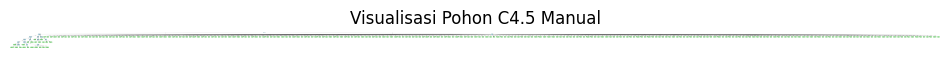

In [27]:
import pandas as pd
import numpy as np
import math
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

# === 1. BACA DAN BERSIHKAN DATASET ===
df = pd.read_csv('abc.csv')  # ganti jika beda nama
df.columns = df.columns.str.strip().str.replace(" ", "_").str.replace("[^A-Za-z0-9_]", "", regex=True)

# Tentukan target
target_col = "TARGET"  # Ganti sesuai target Anda
features = [col for col in df.columns if col != target_col]

# Diskretisasi otomatis untuk fitur numerik
for col in df[features].select_dtypes(include=["int64", "float64"]).columns:
    try:
        df[col] = pd.qcut(df[col], q=3, duplicates='drop', labels=["Rendah", "Sedang", "Tinggi"])
    except:
        df[col] = pd.cut(df[col], bins=3, labels=["Rendah", "Sedang", "Tinggi"])

# Hilangkan nilai kosong dan ubah ke kategori
df = df.dropna()
for col in df.columns:
    df[col] = df[col].astype("category")

# === 2. ENTROPY DAN GAIN RATIO ===
def entropy(data, target_col):
    entropy = 0
    for val in data[target_col].unique():
        p = len(data[data[target_col] == val]) / len(data)
        if p > 0:
            entropy -= p * math.log2(p)
    return entropy

def gain_ratio(data, feature, target_col):
    total_entropy = entropy(data, target_col)
    split_entropy = 0
    intrinsic_info = 0
    for val in data[feature].unique():
        subset = data[data[feature] == val]
        p = len(subset) / len(data)
        split_entropy += p * entropy(subset, target_col)
        if p > 0:
            intrinsic_info -= p * math.log2(p)
    info_gain = total_entropy - split_entropy
    return info_gain / intrinsic_info if intrinsic_info != 0 else 0

# === 3. NODE DAN BANGUN POHON ===
class C45Node:
    def __init__(self, name, is_leaf=False, gain_ratio_value=None, samples=None):
        self.name = name
        self.is_leaf = is_leaf
        self.gain_ratio_value = gain_ratio_value
        self.samples = samples
        self.children = {}

def build_c45_tree(data, features, target_col):
    if len(data[target_col].unique()) == 1:
        return C45Node(str(data[target_col].iloc[0]), is_leaf=True, samples=len(data))
    if len(features) == 0:
        return C45Node(str(data[target_col].mode()[0]), is_leaf=True, samples=len(data))

    gain_ratios = [gain_ratio(data, f, target_col) for f in features]
    best_idx = np.argmax(gain_ratios)
    best_feature = features[best_idx]
    best_gain = gain_ratios[best_idx]

    root = C45Node(name=best_feature, gain_ratio_value=best_gain, samples=len(data))
    for val in data[best_feature].unique():
        subset = data[data[best_feature] == val]
        if subset.empty:
            child = C45Node(str(data[target_col].mode()[0]), is_leaf=True, samples=0)
        else:
            child = build_c45_tree(subset, [f for f in features if f != best_feature], target_col)
        root.children[val] = child
    return root

# === 4. PREDIKSI DAN EVALUASI ===
def predict_with_tree(row, node):
    while not node.is_leaf:
        val = row.get(node.name)
        if val in node.children:
            node = node.children[val]
        else:
            return None
    return node.name

# === 5. VISUALISASI POHON DI LAYAR ===
def visualize_tree(node, dot=None, parent=None, edge_label=""):
    if dot is None:
        dot = graphviz.Digraph(format='png')
        dot.attr(rankdir='TB')
        dot.attr('node', style='filled', fontname='Arial', fontsize='10')

    node_id = str(id(node))
    if node.is_leaf:
        label = f"Label: {node.name}\nSamples: {node.samples}"
        dot.node(node_id, label=label, fillcolor='lightgreen', shape='oval')
    else:
        label = f"{node.name}\nGain: {node.gain_ratio_value:.3f}\nSamples: {node.samples}"
        dot.node(node_id, label=label, fillcolor='lightblue', shape='box')

    if parent:
        dot.edge(parent, node_id, label=str(edge_label), fontsize='10')

    for val, child in node.children.items():
        visualize_tree(child, dot, node_id, val)

    return dot

# === 6. EKSEKUSI ===
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)
tree_root = build_c45_tree(train_data, features, target_col)

# Prediksi
y_true = test_data[target_col].astype(str).values
y_pred = [predict_with_tree(row, tree_root) for _, row in test_data.iterrows()]
filtered = [(yt, yp) for yt, yp in zip(y_true, y_pred) if yp is not None]
y_true_clean, y_pred_clean = zip(*filtered)

# Evaluasi
print("\n=== Laporan Klasifikasi ===")
print(classification_report(y_true_clean, y_pred_clean))
print("Akurasi:", accuracy_score(y_true_clean, y_pred_clean))

# Visualisasi
dot = visualize_tree(tree_root)
png_data = dot.pipe(format='png')
image = Image.open(BytesIO(png_data))

# Simpan ke file PNG
image.save("pohon_c45.png")
print("File pohon C4.5 berhasil disimpan sebagai 'pohon_c45.png'")


# Tampilkan
plt.figure(figsize=(12, 12))
plt.imshow(image)
plt.axis('off')
plt.title("Visualisasi Pohon C4.5 Manual")
plt.show()



=== Laporan Klasifikasi ===
              precision    recall  f1-score   support

       Layak       1.00      0.93      0.96        14
 Tidak Layak       0.98      1.00      0.99        41

    accuracy                           0.98        55
   macro avg       0.99      0.96      0.98        55
weighted avg       0.98      0.98      0.98        55

Akurasi: 0.9818181818181818


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.739228 to fit


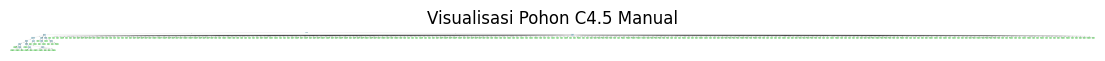

✅ Visualisasi pohon berhasil disimpan sebagai:
- pohon_c45.png
- pohon_c45.pdf


In [28]:
import pandas as pd
import numpy as np
import math
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

# === 1. BACA DAN BERSIHKAN DATASET ===
df = pd.read_csv('abc.csv')  # ganti nama file jika berbeda
df.columns = df.columns.str.strip().str.replace(" ", "_").str.replace("[^A-Za-z0-9_]", "", regex=True)

# Tentukan target
target_col = "TARGET"  # ganti sesuai kolom target
features = [col for col in df.columns if col != target_col]

# Diskretisasi numerik
for col in df[features].select_dtypes(include=["int64", "float64"]).columns:
    try:
        df[col] = pd.qcut(df[col], q=3, duplicates='drop', labels=["Rendah", "Sedang", "Tinggi"])
    except:
        df[col] = pd.cut(df[col], bins=3, labels=["Rendah", "Sedang", "Tinggi"])

# Drop NA dan ubah ke kategori
df = df.dropna()
for col in df.columns:
    df[col] = df[col].astype("category")

# === 2. ENTROPY & GAIN RATIO ===
def entropy(data, target_col):
    entropy = 0
    for val in data[target_col].unique():
        p = len(data[data[target_col] == val]) / len(data)
        if p > 0:
            entropy -= p * math.log2(p)
    return entropy

def gain_ratio(data, feature, target_col):
    total_entropy = entropy(data, target_col)
    split_entropy = 0
    intrinsic_info = 0
    for val in data[feature].unique():
        subset = data[data[feature] == val]
        p = len(subset) / len(data)
        split_entropy += p * entropy(subset, target_col)
        if p > 0:
            intrinsic_info -= p * math.log2(p)
    info_gain = total_entropy - split_entropy
    return info_gain / intrinsic_info if intrinsic_info != 0 else 0

# === 3. NODE & POHON ===
class C45Node:
    def __init__(self, name, is_leaf=False, gain_ratio_value=None, samples=None):
        self.name = name
        self.is_leaf = is_leaf
        self.gain_ratio_value = gain_ratio_value
        self.samples = samples
        self.children = {}

def build_c45_tree(data, features, target_col):
    if len(data[target_col].unique()) == 1:
        return C45Node(str(data[target_col].iloc[0]), is_leaf=True, samples=len(data))
    if len(features) == 0:
        return C45Node(str(data[target_col].mode()[0]), is_leaf=True, samples=len(data))

    gain_ratios = [gain_ratio(data, f, target_col) for f in features]
    best_idx = np.argmax(gain_ratios)
    best_feature = features[best_idx]
    best_gain = gain_ratios[best_idx]

    root = C45Node(name=best_feature, gain_ratio_value=best_gain, samples=len(data))
    for val in data[best_feature].unique():
        subset = data[data[best_feature] == val]
        if subset.empty:
            child = C45Node(str(data[target_col].mode()[0]), is_leaf=True, samples=0)
        else:
            child = build_c45_tree(subset, [f for f in features if f != best_feature], target_col)
        root.children[val] = child
    return root

# === 4. PREDIKSI & EVALUASI ===
def predict_with_tree(row, node):
    while not node.is_leaf:
        val = row.get(node.name)
        if val in node.children:
            node = node.children[val]
        else:
            return None
    return node.name

# === 5. VISUALISASI POHON ===
def visualize_tree(node, dot=None, parent=None, edge_label=""):
    if dot is None:
        dot = graphviz.Digraph(format='png')
        dot.attr(rankdir='TB')
        dot.attr('node', style='filled', fontname='Arial', fontsize='10')

    node_id = str(id(node))
    if node.is_leaf:
        label = f"Label: {node.name}\nSamples: {node.samples}"
        dot.node(node_id, label=label, fillcolor='lightgreen', shape='ellipse')
    else:
        label = f"{node.name}\nGainRatio: {node.gain_ratio_value:.3f}\nSamples: {node.samples}"
        dot.node(node_id, label=label, fillcolor='lightblue', shape='box')

    if parent:
        dot.edge(parent, node_id, label=str(edge_label), fontsize='10')

    for val, child in node.children.items():
        visualize_tree(child, dot, node_id, val)

    return dot

# === 6. LATIH & EVALUASI ===
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)
tree_root = build_c45_tree(train_data, features, target_col)

# Prediksi
y_true = test_data[target_col].astype(str).values
y_pred = [predict_with_tree(row, tree_root) for _, row in test_data.iterrows()]
filtered = [(yt, yp) for yt, yp in zip(y_true, y_pred) if yp is not None]
y_true_clean, y_pred_clean = zip(*filtered)

# Evaluasi
print("\n=== Laporan Klasifikasi ===")
print(classification_report(y_true_clean, y_pred_clean))
print("Akurasi:", accuracy_score(y_true_clean, y_pred_clean))

# === 7. VISUALISASI DI LAYAR & SIMPAN ===
dot = visualize_tree(tree_root)
# Simpan ke PNG dan PDF
png_data = dot.pipe(format='png')
pdf_data = dot.pipe(format='pdf')

# Tampilkan di layar
image = Image.open(BytesIO(png_data))
plt.figure(figsize=(14, 14))
plt.imshow(image)
plt.axis('off')
plt.title("Visualisasi Pohon C4.5 Manual")
plt.show()

# Simpan file
with open("pohon_c45.png", "wb") as f:
    f.write(png_data)

with open("pohon_c45.pdf", "wb") as f:
    f.write(pdf_data)

print("✅ Visualisasi pohon berhasil disimpan sebagai:")
print("- pohon_c45.png")
print("- pohon_c45.pdf")
